### Stock Market Prediction And Forecasting Using Stacked LSTM

In [594]:
### Keras and Tensorflow >2.0

In [598]:
### Data Collection
import pandas_datareader as pdr
key=""

In [599]:
df = pdr.get_data_tiingo('GOOGL', api_key='5d255bacba4c67789ce8eeb855f7fe4f6e2afc5d')

In [600]:
import pandas as pd

In [601]:
df=pd.read_csv('GOOGL.csv')

In [602]:
df.head()

symbol                       date   close    high       low    open  \
0  GOOGL  2016-05-03 00:00:00+00:00  708.56  713.24  702.6500  704.76   
1  GOOGL  2016-05-04 00:00:00+00:00  711.37  715.05  704.0500  706.77   
2  GOOGL  2016-05-05 00:00:00+00:00  714.71  717.55  709.4501  715.00   
3  GOOGL  2016-05-06 00:00:00+00:00  725.18  725.99  711.9500  712.20   
4  GOOGL  2016-05-09 00:00:00+00:00  729.13  734.29  723.5000  726.70   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1566412    708.56   713.24  702.6500   704.76    1566412      0.0   
1  1708609    711.37   715.05  704.0500   706.77    1708609      0.0   
2  1483357    714.71   717.55  709.4501   715.00    1483357      0.0   
3  1997628    725.18   725.99  711.9500   712.20    1997628      0.0   
4  1903689    729.13   734.29  723.5000   726.70    1903689      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

In [603]:
df.tail()

symbol                       date    close     high       low       open  \
1253  GOOGL  2021-04-26 00:00:00+00:00  2309.93  2324.53  2297.315  2304.5200   
1254  GOOGL  2021-04-27 00:00:00+00:00  2290.98  2318.45  2286.160  2317.6326   
1255  GOOGL  2021-04-28 00:00:00+00:00  2359.04  2431.38  2353.220  2392.4954   
1256  GOOGL  2021-04-29 00:00:00+00:00  2392.76  2404.16  2373.850  2389.2300   
1257  GOOGL  2021-04-30 00:00:00+00:00  2353.50  2381.85  2346.560  2368.0200   

       volume  adjClose  adjHigh    adjLow    adjOpen  adjVolume  divCash  \
1253  1601892   2309.93  2324.53  2297.315  2304.5200    1601892      0.0   
1254  2219280   2290.98  2318.45  2286.160  2317.6326    2219280      0.0   
1255  4055340   2359.04  2431.38  2353.220  2392.4954    4055340      0.0   
1256  2061654   2392.76  2404.16  2373.850  2389.2300    2061654      0.0   
1257  2242838   2353.50  2381.85  2346.560  2368.0200    2242838      0.0   

      splitFactor  
1253          1.0  
1254          1.0  
1255          1.0  
1256          1.0  
1257          1.0

In [604]:
df1=df.reset_index()['adjClose']

In [605]:
df1

0        708.56
1        711.37
2        714.71
3        725.18
4        729.13
         ...   
1253    2309.93
1254    2290.98
1255    2359.04
1256    2392.76
1257    2353.50
Name: adjClose, Length: 1258, dtype: float64

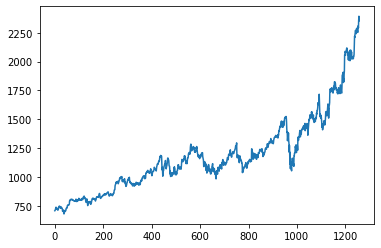

In [606]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [607]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [608]:
import numpy as np

In [609]:
df1

0        708.56
1        711.37
2        714.71
3        725.18
4        729.13
         ...   
1253    2309.93
1254    2290.98
1255    2359.04
1256    2392.76
1257    2353.50
Name: adjClose, Length: 1258, dtype: float64

In [610]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [611]:
print(df1)

[[0.01601991]
 [0.01766163]
 [0.019613  ]
 ...
 [0.98029937]
 [1.        ]
 [0.97706267]]


In [612]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [613]:
training_size,test_size

(817, 441)

In [614]:
train_data

array([[0.01601991],
       [0.01766163],
       [0.019613  ],
       [0.02573001],
       [0.02803777],
       [0.03402624],
       [0.02886739],
       [0.02741847],
       [0.02552553],
       [0.02872133],
       [0.02281464],
       [0.02374359],
       [0.01996354],
       [0.02370269],
       [0.02109697],
       [0.03031631],
       [0.03327841],
       [0.03259485],
       [0.03882871],
       [0.03955901],
       [0.03933116],
       [0.03688319],
       [0.03196971],
       [0.02858111],
       [0.02918288],
       [0.0361003 ],
       [0.03586076],
       [0.03040979],
       [0.02964443],
       [0.03044484],
       [0.02982555],
       [0.02518667],
       [0.01350183],
       [0.0146002 ],
       [0.01620687],
       [0.01713581],
       [0.01970648],
       [0.00237202],
       [0.        ],
       [0.00591253],
       [0.0082086 ],
       [0.01308117],
       [0.01700728],
       [0.01387574],
       [0.01625945],
       [0.0152604 ],
       [0.02140662],
       [0.026

In [615]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [616]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [617]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [618]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [619]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [620]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [621]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [622]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_40 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_41 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [623]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_40 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_41 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [624]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 162ms/step - loss: 0.0303 - val_loss: 0.0530
Epoch 2/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0033 - val_loss: 0.0138
Epoch 3/100
12/12 [==============================] - 1s 93ms/step - loss: 0.0016 - val_loss: 0.0176
Epoch 4/100
12/12 [==============================] - 1s 93ms/step - loss: 8.1354e-04 - val_loss: 0.0059
Epoch 5/100
12/12 [==============================] - 1s 99ms/step - loss: 5.6593e-04 - val_loss: 0.0030
Epoch 6/100
12/12 [==============================] - 1s 108ms/step - loss: 5.5483e-04 - val_loss: 0.0036
Epoch 7/100
12/12 [==============================] - 1s 96ms/step - loss: 5.5110e-04 - val_loss: 0.0036
Epoch 8/100
12/12 [==============================] - 1s 91ms/step - loss: 5.7988e-04 - val_loss: 0.0034
Epoch 9/100
12/12 [==============================] - 1s 93ms/step - loss: 5.5138e-04 - val_loss: 0.0039
Epoch 10/100
12/12 [==============================] - 1s 90ms/step - loss:

In [625]:
import tensorflow as tf

In [626]:
tf.__version__

'2.4.1'

In [627]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [628]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [629]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1055.0214008747246

In [630]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1476.452476500418

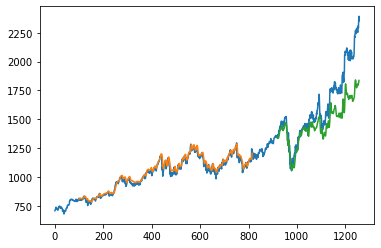

In [631]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [632]:
len(test_data)

441

In [633]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [634]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [635]:
temp_input

[0.6636344515721947,
 0.6603042731447398,
 0.6407496991154576,
 0.6347845900375083,
 0.638961919117561,
 0.6257931082833804,
 0.6309461212184947,
 0.6286734205022141,
 0.6189282667881889,
 0.610579451046377,
 0.6154520279033896,
 0.6070740000701088,
 0.6117537771234268,
 0.6152183311716385,
 0.6384711559808834,
 0.6290064383449595,
 0.6164393965950384,
 0.6260151201785443,
 0.610526869281733,
 0.6186595155466749,
 0.6086280833362544,
 0.6386931678760471,
 0.6524170084481368,
 0.6281476028557739,
 0.6171288019537046,
 0.6228660567181966,
 0.6133253876444537,
 0.6113973896075061,
 0.6446115376076463,
 0.7004650564961846,
 0.7028487631600472,
 0.7077622369451161,
 0.7087671328916464,
 0.7167537186992438,
 0.6647503534663067,
 0.6847664785407975,
 0.6696696696696695,
 0.708060200278099,
 0.7232796999333962,
 0.804933338007268,
 0.8018660684030333,
 0.8224313807971394,
 0.81991329851252,
 0.8145791706102988,
 0.821058412498101,
 0.822384641450789,
 0.8260536801392832,
 0.8352087496056365,
 

In [636]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6967717]
101
1 day input [0.66030427 0.6407497  0.63478459 0.63896192 0.62579311 0.63094612
 0.62867342 0.61892827 0.61057945 0.61545203 0.607074   0.61175378
 0.61521833 0.63847116 0.62900644 0.6164394  0.62601512 0.61052687
 0.61865952 0.60862808 0.63869317 0.65241701 0.6281476  0.6171288
 0.62286606 0.61332539 0.61139739 0.64461154 0.70046506 0.70284876
 0.70776224 0.70876713 0.71675372 0.66475035 0.68476648 0.66966967
 0.7080602  0.7232797  0.80493334 0.80186607 0.82243138 0.8199133
 0.81457917 0.82105841 0.82238464 0.82605368 0.83520875 0.83983594
 0.83235181 0.8224197  0.80223414 0.8056578  0.81949849 0.77985184
 0.78333392 0.81123146 0.80820509 0.77719938 0.7903565  0.82724553
 0.77491499 0.79411318 0.79167689 0.82927285 0.79974527 0.8023393
 0.81954523 0.81856954 0.7830009  0.78628434 0.78846356 0.79467989
 0.78953857 0.78949767 0.78498148 0.79728561 0.7976829  0.80705998
 0.84635608 0.89845877 0.89279162 0.9101845  0.91684486 0.92866992
 0.91345042 0.91918183 0.91186712 0.9

In [637]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [638]:
import matplotlib.pyplot as plt

In [639]:
len(df1)

1258

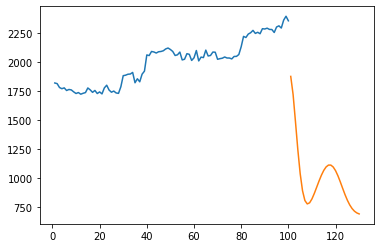

In [640]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

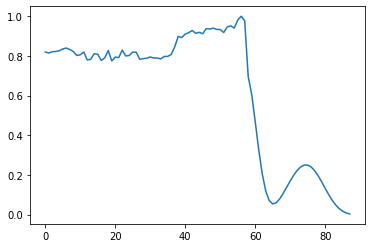

In [641]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [642]:
df3=scaler.inverse_transform(df3).tolist()

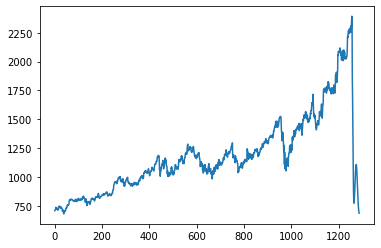

In [643]:
plt.plot(df3)